In [335]:
# Movie folder: https://drive.google.com/drive/folders/13JVx5e_zP5ZKrpDk_yFWKa76XebMhTzG?usp=sharing
# Save the movie folder to Google Drive before run the following code

# from google.colab import drive
# drive.mount('/content/drive')

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import colorsys
import ast
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,f1_score, confusion_matrix, accuracy_score
from scipy.stats import percentileofscore
from sklearn.neighbors import KNeighborsClassifier

pd.options.display.max_colwidth = 100

In [337]:
# Load CSV files
# movie_fdr_path = '/content/drive/MyDrive/movie'
# credit_df = pd.read_csv(os.path.join(movie_fdr_path, 'tmdb_5000_credits.csv'))
# movie_df = pd.read_csv(os.path.join(movie_fdr_path, 'tmdb_5000_movies.csv'))
credit_df = pd.read_csv('tmdb_5000_credits.csv')
movie_df = pd.read_csv('tmdb_5000_movies.csv')


# Data Munging

## Data info

In [338]:
credit_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""credit_id"": ""52fe4d22c3a368484e1d8d6b"", ""gender"": 2,...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""department"": ""Sound"", ""gender"": 2, ""id"": 153, ""job"":..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Batman"", ""credit_id"": ""52fe4781c3a36847f8139869"", ""g...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""department"": ""Sound"", ""gender"": 2, ""id"": 947, ""job"":..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""credit_id"": ""52fe479ac3a36847f813ea75"", ""gender"": 2...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""department"": ""Writing"", ""gender"": 2, ""id"": 7, ""job"":..."


In [339]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [340]:
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United ...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret...",en,Spectre,A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {""name"": ""B24"", ""id"": ...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""US"", ""name"": ""United States of ...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": ...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853, ""name"": ""crime fighter""}, {""id"": 949, ""name"": ""te...",en,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""name"": ""Warner Bros."", ""id"": 6194}, {""name"": ""DC E...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fic...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"": 839, ""name"": ""mars""}, {""id"": 1456, ""name"": ""medal...",en,John Carter,"John Carter is a war-weary, former military captain who's inexplicably transported to the myster...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of Ameri

In [341]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [342]:
credit_df.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [343]:
movie_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Merge datasets


In [344]:
merged_df = pd.merge(movie_df, credit_df, left_on='id', right_on="movie_id")

In [345]:
merged_df = merged_df.drop("movie_id", axis=1)

In [346]:
merged_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret...",en,Spectre,A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {""name"": ""B24"", ""id"": ...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""credit_id"": ""52fe4d22c3a368484e1d8d6b"", ""gender"": 2,...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""department"": ""Sound"", ""gender"": 2, ""id"": 153, ""job"":..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": ...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853, ""name"": ""crime fighter""}, {""id"": 949, ""name"": ""te...",en,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""name"": ""Warner Bros."", ""id"": 6194}, {""name"": ""DC E...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Batman"", ""credit_id"": ""52fe4781c3a36847f8139869"", ""g...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""department"": ""Sound"", ""gender"": 2, ""id"": 947, ""job"":...

In [347]:
merged_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

## Clean data

In [348]:
print(merged_df.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64


In [349]:
# the missing data of homepage is 64%, so we can drop this column. 
# the missing data of the tagline is 17.5%, so we also want to drop this column.
# and I drop the rows that cotain NA value in runtime, release_date, and overview
merged_df = merged_df.drop(['homepage', 'tagline'], axis=1)
merged_df = merged_df.dropna(subset=['runtime', 'release_date', 'overview'])
print(merged_df.isnull().sum())

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64


In [350]:
#check duplication
print("movie duplicated: ",merged_df.duplicated().sum())

movie duplicated:  0


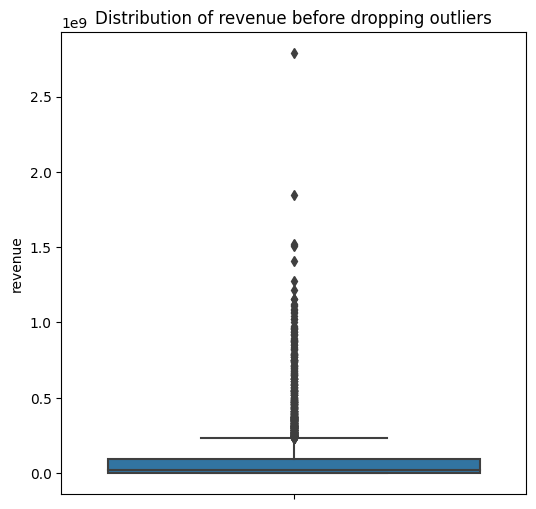

In [351]:
#check outlier
plt.figure(figsize=(6,6))
sns.boxplot(y=movie_df['revenue'])
plt.title("Distribution of revenue before dropping outliers") 
plt.show()

In [352]:
# the highest thresold
max_thresold = merged_df['revenue'].quantile(0.95)
# the lowest thresold
min_thresold = merged_df['revenue'].quantile(0.05)
# only keep the data with price between the highest thresold and lowest threso 
merged_df = merged_df[(merged_df['revenue'] < max_thresold) & (merged_df['revenue'] > min_thresold)]

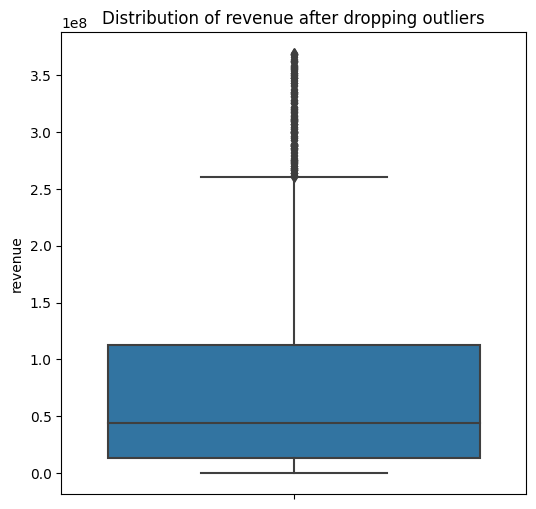

In [353]:
# figure of the distribution of price with data after dropping outliers
plt.figure(figsize=(6,6))
sns.boxplot(y=merged_df['revenue'])
plt.title("Distribution of revenue after dropping outliers") 
plt.show()

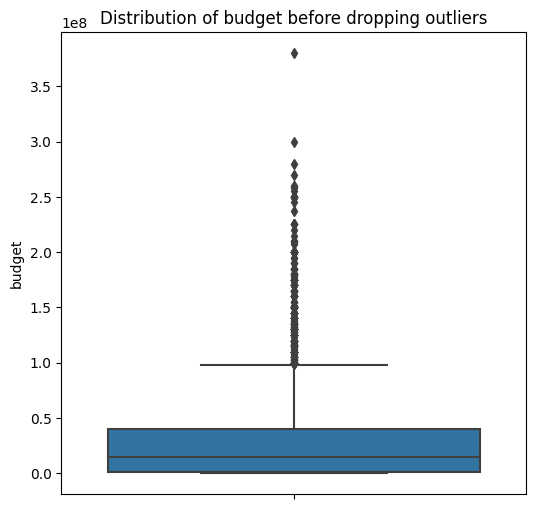

In [354]:
#check outlier
plt.figure(figsize=(6,6))
sns.boxplot(y=movie_df['budget'])
plt.title("Distribution of budget before dropping outliers") 
plt.show()

In [355]:
# the highest thresold
max_thresold = merged_df['budget'].quantile(0.95)
# the lowest thresold
min_thresold = merged_df['budget'].quantile(0.05)
# only keep the data with price between the highest thresold and lowest threso 
merged_df = merged_df[(merged_df['budget'] < max_thresold) & (merged_df['budget'] > min_thresold)]

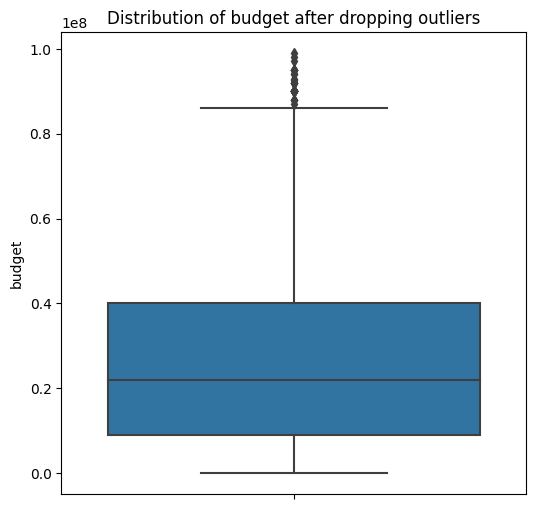

In [356]:
# figure of the distribution of price with data after dropping outliers
plt.figure(figsize=(6,6))
sns.boxplot(y=merged_df['budget'])
plt.title("Distribution of budget after dropping outliers") 
plt.show()

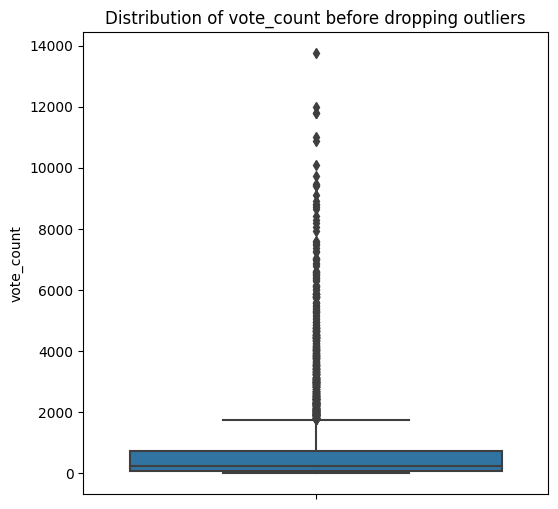

In [357]:
#check outlier
plt.figure(figsize=(6,6))
sns.boxplot(y=movie_df['vote_count'])
plt.title("Distribution of vote_count before dropping outliers") 
plt.show()

In [358]:
# the highest thresold
max_thresold = merged_df['vote_count'].quantile(0.95)
# the lowest thresold
min_thresold = merged_df['vote_count'].quantile(0.05)
# only keep the data with price between the highest thresold and lowest threso 
merged_df = merged_df[(merged_df['vote_count'] < max_thresold) & (merged_df['vote_count'] > min_thresold)]

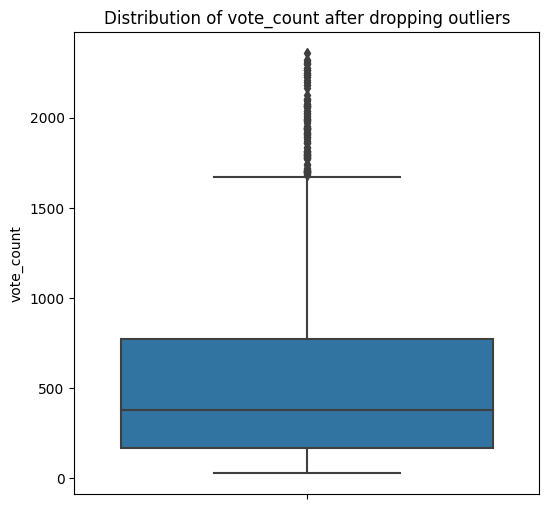

In [359]:
# figure of the distribution of price with data after dropping outliers
plt.figure(figsize=(6,6))
sns.boxplot(y=merged_df['vote_count'])
plt.title("Distribution of vote_count after dropping outliers") 
plt.show()

In [360]:
merged_df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title_x,vote_average,vote_count,title_y,cast,crew
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""name"": ""Drama""}, {""i...",315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671, ""name"": ""godzilla""}, {""id"": 11100, ""name"": ""giant...",ja,シン・ゴジラ,"From the mind behind Evangelion comes a hit larger than life. When a massive, gilled monster em...",9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ""Toho Pictures"", ""id"": 49301}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",...,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso_639_1"": ...",Released,Shin Godzilla,6.5,143,Shin Godzilla,"[{""cast_id"": 4, ""character"": ""Rando Yaguchi : Deputy Chief Cabinet Secretary"", ""credit_id"": ""560...","[{""credit_id"": ""5921d321c3a368799b05933f"", ""department"": ""Sound"", ""gender"": 0, ""id"": 17132, ""job..."
151,70000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""name"": ""Action""}, {""id"": 16, ""name"": ""Animation""}]",2310,"[{""id"": 509, ""name"": ""denmark""}, {""id"": 2037, ""name"": ""nordic mythology""}, {""id"": 2251, ""name"": ...",en,Beowulf,"6th-century Scandinavian warrior, Beowulf embarks on a mission to slay the manlike ogre Grendel,...",35.601665,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""name"": ""Shangri-La Entertainment"", ""id"": 2265}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",...,195735876,115.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Beowulf,5.5,841,Beowulf,"[{""cast_id"": 24, ""character"": ""Beowulf / Golden Man / Dragon"", ""credit_id"": ""52fe434cc3a36847f80...","[{""credit_id"": ""52fe434cc3a36847f8049c1b"", ""department"": ""Sound"", ""gender"": 2, ""id"": 37, ""job"": ..."
207,65000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fic...",861,"[{""id"": 560, ""name"": ""oxygen""}, {""id"": 769, ""name"": ""falsely accused""}, {""id"": 836, ""name"": ""res...",en,Total Recall,Construction worker Douglas Quaid discovers a memory chip in his brain during a virtual-reality ...,43.129703,"[{""name"": ""TriStar Pictures"", ""id"": 559}, {""name"": ""Carolco Pictures"", ""id"": 14723}, {""name"": ""C...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",...,261317921,113.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Total Recall,7.1,1710,Total Recall,"[{""cast_id"": 23, ""character"": ""Douglas Quaid/Hauser"", ""credit_id"": ""52fe4283c3a36847f8024e9b"", ""...","[{""credit_id"": ""52fe4283c3a36847f8024ec5"", ""department"": ""Writing"", ""gender"": 2, ""id"": 584, ""job..."
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""name"": ""Comedy""}, {...",2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 1200, ""name"": ""greece""}, {""id"": 1396, ""name"": ""colos...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Games in order to help their friend Alafolix marry Pr...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name"": ""TF1 Films Productions"", ""id"": 356}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso_3166_1"":...",...,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,Asterix at the Olympic Games,5.0,471,Asterix at the Olympic Games,"[{""cast_id"": 15, ""character"": ""Asterix"", ""credit_id"": ""52fe4354c3a36847f804c0c1"", ""gender"": 2, ""...","[{""credit_id"": ""52fe4354c3a36847f804c0b1"", ""department"": ""Camera"", ""gender"": 2, ""id"

## Parse Json

In [361]:
merged_df['genres'].head(1)

97    [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 18, "name": "Drama"}, {"i...
Name: genres, dtype: object

In [362]:
def extract_name(data, attr = ['name']): 
    result = []
    for i in ast.literal_eval(data): 
        for a in attr:
            result.append(i[a])
    return result


In [363]:
merged_df['genres'] = merged_df['genres'].apply(extract_name)
merged_df['keywords'] = merged_df['keywords'].apply(extract_name)
merged_df['production_companies'] = merged_df['production_companies'].apply(extract_name)
merged_df['production_countries'] = merged_df['production_countries'].apply(extract_name)
merged_df['spoken_languages'] = merged_df['spoken_languages'].apply(extract_name)
merged_df['cast'] = merged_df["cast"].apply(extract_name)

In [364]:
merged_df[['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages', 'cast']]

,genres,keywords,production_companies,production_countries,spoken_languages,cast
97,"[Action, Adventure, Drama, Horror, Science Fiction]","[monster, godzilla, giant monster, destruction, kaiju, toyko]","[Cine Bazar, Toho Pictures]",[Japan],"[Italiano, Deutsch, English, 日本語]","[Hiroki Hasegawa, Yutaka Takenouchi, Satomi Ishihara, Kengo Kora, Matsuo Satoru, Mikako Ichikawa..."
151,"[Adventure, Action, Animation]","[denmark, nordic mythology, lie, pride and vanity, folk hero, human weakness, viking, alienation...","[Paramount Pictures, Shangri-La Entertainment, ImageMovers, Paramount Animation]",[United States of America],[English],"[Ray Winstone, Angelina Jolie, Anthony Hopkins, Robin Wright, John Malkovich, Brendan Gleeson, C..."
207,"[Action, Adventure, Science Fiction]","[oxygen, falsely accused, resistance, mars, double life, telepathy, mutant, hologram, space colo...","[TriStar Pictures, Carolco Pictures, Carolco International N.V.]",[United States of America],[English],"[Arnold Schwarzenegger, Sharon Stone, Rachel Ticotin, Ronny Cox, Michael Ironside, Marshall Bell..."
235,"[Fantasy, Adventure, Comedy, Family]","[competition, greece, colosseum, olympic games, emperor, magic, horse, roman, wild boar, governa...","[Constantin Film, TF1 Films Productions, Pathé Renn Productions, La Petite Reine, Tri Pictures, ...","[Belgium, France, Germany, Italy, Spain]","[Français, Português]","[Clovis Cornillac, Gérard Depardieu, Franck Dubosc, José Garcia, Stéphane Rousseau, Jean-Pierre ..."
273,"[Action, Crime, Thriller]","[brother brother relationship, detective, car race, car thief, blackmail, brother, remake, heist...","[Jerry Bruckheimer Films, Touchstone Pictures]",[United States of America],[English],"[Nicolas Cage, Angelina Jolie, Giovanni Ribisi, Delroy Lindo, Will Patton, Christopher Eccleston..."
...,...,...,...,...,...,...
4773,[Comedy],"[salesclerk, loser, aftercreditsstinger]","[Miramax Films, View Askew Productions]",[United States of America],[English],"[Brian O'Halloran, Jeff Anderson, Jason Mewes, Kevin Smith, Lisa Spoonhauer, Marilyn Ghigliotti,..."
4788,"[Horror, Comedy, Crime]","[gay, trailer park, pop culture, drug dealer, heroin, fetishism, spanner, excrements , disgust, ...",[Dreamland Productions],[United States of America],[English],"[Divine, David Lochary, Mary Vivian Pearce, Mink Stole, Danny Mills, Edith Massey, Channing Wilr..."
4792,"[Crime, Horror, Mystery, Thriller]","[japan, prostitute, hotel, based on novel, hallucination, interview, investigation, murder, junk...",[Daiei Studios],[Japan],[日本語],"[Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki, Anna Nakagawa, Yukijiro Hotaru, Denden, Ren Osug..."
4796,"[Science Fiction, Drama, Thriller]","[distrust, garage, identity crisis, time travel, time machine, mathematics, independent film, pa...",[Thinkfilm],[United States of America],[English],"[Shane Carruth, David Sullivan, Casey Gooden, Anand Upadhyaya, Carrie Crawford, Jay Butler, John..."


In [365]:
def get_director(data):
    for i in ast.literal_eval(data):
        if i['department'] == 'Directing':
            return i['name']

def get_producer(data):
    for i in ast.literal_eval(data):
        if i['job'] == 'Producer':
            return i['name']

In [366]:
merged_df['Director'] = merged_df['crew'].apply(get_director)
merged_df['Producer'] = merged_df['crew'].apply(get_producer)


In [367]:
merged_df = merged_df.drop(["crew"], axis=1)

In [368]:
merged_df[['Director', 'Producer']]

,Director,Producer
97,Hideaki Anno,Kazutoshi Wadakura
151,Robert Zemeckis,Robert Zemeckis
207,Paul Verhoeven,Ronald Shusett
235,Thomas Langmann,Thomas Langmann
273,Dominic Sena,Jerry Bruckheimer
...,...,...
4773,Kevin Smith,Kevin Smith
4788,John Waters,John Waters
4792,Kiyoshi Kurosawa,None
4796,Shane Carruth,Shane Carruth


# Data Visualization

## Release Date Analysis

In [369]:
merged_df["release_date"]

97      2016-07-29
151     2007-11-05
207     1990-06-01
235     2008-01-13
273     2000-06-09
           ...    
4773    1994-09-13
4788    1972-03-12
4792    1997-11-06
4796    2004-10-08
4798    1992-09-04
Name: release_date, Length: 2534, dtype: object

In [370]:
merged_df["release_date_obj"] = pd.to_datetime(merged_df['release_date'], format='%Y-%m-%d')

In [371]:
# Extract information about release year, month, and day of week
merged_df["release_month"] = merged_df['release_date_obj'].dt.month
merged_df["release_year"] = merged_df['release_date_obj'].dt.year
merged_df['release_day_of_week'] = merged_df['release_date_obj'].dt.day_name()

In [372]:
# display the results
merged_df[["release_month", "release_year","release_day_of_week"]]

,release_month,release_year,release_day_of_week
97,7,2016,Friday
151,11,2007,Monday
207,6,1990,Friday
235,1,2008,Sunday
273,6,2000,Friday
...,...,...,...
4773,9,1994,Tuesday
4788,3,1972,Sunday
4792,11,1997,Thursday
4796,10,2004,Friday


In [373]:
month_count = []
for i in range(1,13):
    month_count.append(len(merged_df[merged_df["release_month"] == i]))

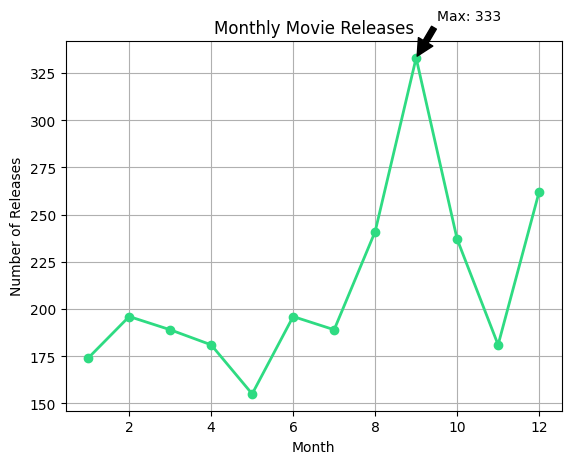

In [374]:
# Plot the data
plt.plot(range(1,13), month_count, '-o', linewidth=2, color='#2edb82')

# Add labels and gridlines
plt.title('Monthly Movie Releases')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.grid(True)

# Add annotations (optional)
max_month = max(month_count)
max_index = month_count.index(max_month)
plt.annotate(f'Max: {max_month}', xy=(max_index+1, max_month), xytext=(max_index+1.5, max_month+20),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()

To better understand how the data evolves over time and identify peak points, we organized the release data into lists for each month and plotted it using line charts. After analyzing the data in this way, we discovered that the month of September had the highest number of movie releases, with a total of 333 movies. This approach allowed us to easily identify the highest data points for each month and visualize the changes in the data over time.

In [375]:
year_dic = {}
for year in merged_df["release_year"]:
    if year in year_dic:
        year_dic[year] += 1
    else:
        year_dic[year] = 1


year_dic = dict(sorted(year_dic.items()))

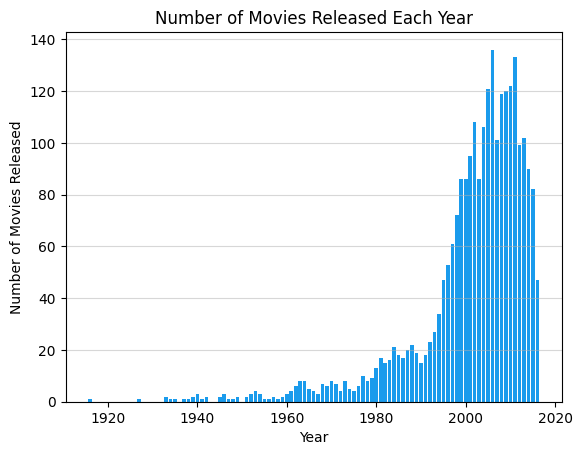

In [376]:
# Create a bar chart of the number of movies released each year
plt.bar(year_dic.keys(), year_dic.values(), color="#1a9bec")

# Add axis labels and a title to the plot
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Number of Movies Released Each Year")

# Increase the font size of the axis labels and title
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Movies Released Each Year", fontsize=12)

# Add a grid to the plot
plt.grid(axis='y', alpha=0.5)

# Display the plot
plt.show()

The bar chart shows that the number of movies released each year has increased steadily from the early 2000s, with a peak of 136 movies released in 2006. After this peak, there appears to be a plateau in the number of movies released, followed by a slight decrease in more recent years.


In [377]:
peak_movies = max(year_dic.values())
peak_year = [(k,v) for k,v in year_dic.items() if v == peak_movies][0][0]
print(peak_year, peak_movies)

2006 136


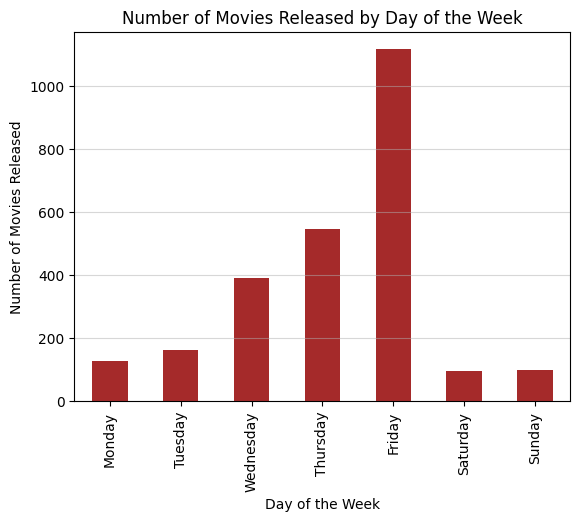

In [378]:

# Group the DataFrame by day of week and count the number of movies released on each day
day_of_week_counts = merged_df.groupby("release_day_of_week").count()["id"]

# Sort the days of the week in ascending order
day_of_week_counts = day_of_week_counts.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Create a bar chart of the number of movies released on each day of the week
day_of_week_counts.plot.bar(color = "brown")

# Add axis labels and a title to the plot
plt.xlabel("Day of the Week")
plt.ylabel("Number of Movies Released")
plt.title("Number of Movies Released by Day of the Week")

# Increase the font size of the axis labels and title
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Movies Released by Day of the Week", fontsize=12)

# Add a grid to the plot
plt.grid(axis='y', alpha=0.5)

# Display the plot
plt.show()


The resulting plot shows that the number of movies released varies by day of the week, with a peak on Fridays and a gradual decrease in the number of releases on weekends. The lowest number of releases occurs on Mondays.


## Movie Genre Analysis

In [379]:
merged_df["genres"]

97      [Action, Adventure, Drama, Horror, Science Fiction]
151                          [Adventure, Action, Animation]
207                    [Action, Adventure, Science Fiction]
235                    [Fantasy, Adventure, Comedy, Family]
273                               [Action, Crime, Thriller]
                               ...                         
4773                                               [Comedy]
4788                                [Horror, Comedy, Crime]
4792                     [Crime, Horror, Mystery, Thriller]
4796                     [Science Fiction, Drama, Thriller]
4798                              [Action, Crime, Thriller]
Name: genres, Length: 2534, dtype: object

In [380]:
merged_df["release_year"]

97      2016
151     2007
207     1990
235     2008
273     2000
        ... 
4773    1994
4788    1972
4792    1997
4796    2004
4798    1992
Name: release_year, Length: 2534, dtype: int64

In [381]:
# create a 2D dictionary s.t the key of outer dictionary is the year and the key of inner 
# dictionary is the genre. The inner dictionary stores the frequency of each genre occur in the dataset
genre_dic = {}
for index, row in merged_df.iterrows():
    if row['release_year'] not in genre_dic:
        genre_dic[row['release_year']] = {}
        
    for genre in row['genres']:
        if genre in genre_dic[row['release_year']]:
            genre_dic[row['release_year']][genre] += 1
        else:
            genre_dic[row['release_year']][genre] = 1

In [382]:
all_genres = set()
for year in genre_dic:
    for genre in genre_dic[year]:
        if genre not in all_genres:
            all_genres.add(genre)

# fill zeros
for year in genre_dic:
    for genre in all_genres:
        if genre not in genre_dic[year]:
            genre_dic[year][genre] = 0

            

In [383]:
genre_dic[2016]

{'Action': 15,
 'Adventure': 6,
 'Drama': 17,
 'Horror': 11,
 'Science Fiction': 3,
 'Family': 3,
 'Animation': 2,
 'History': 5,
 'Thriller': 16,
 'Crime': 4,
 'Comedy': 16,
 'War': 2,
 'Romance': 4,
 'Fantasy': 2,
 'Western': 1,
 'Mystery': 4,
 'Music': 0,
 'Documentary': 0}

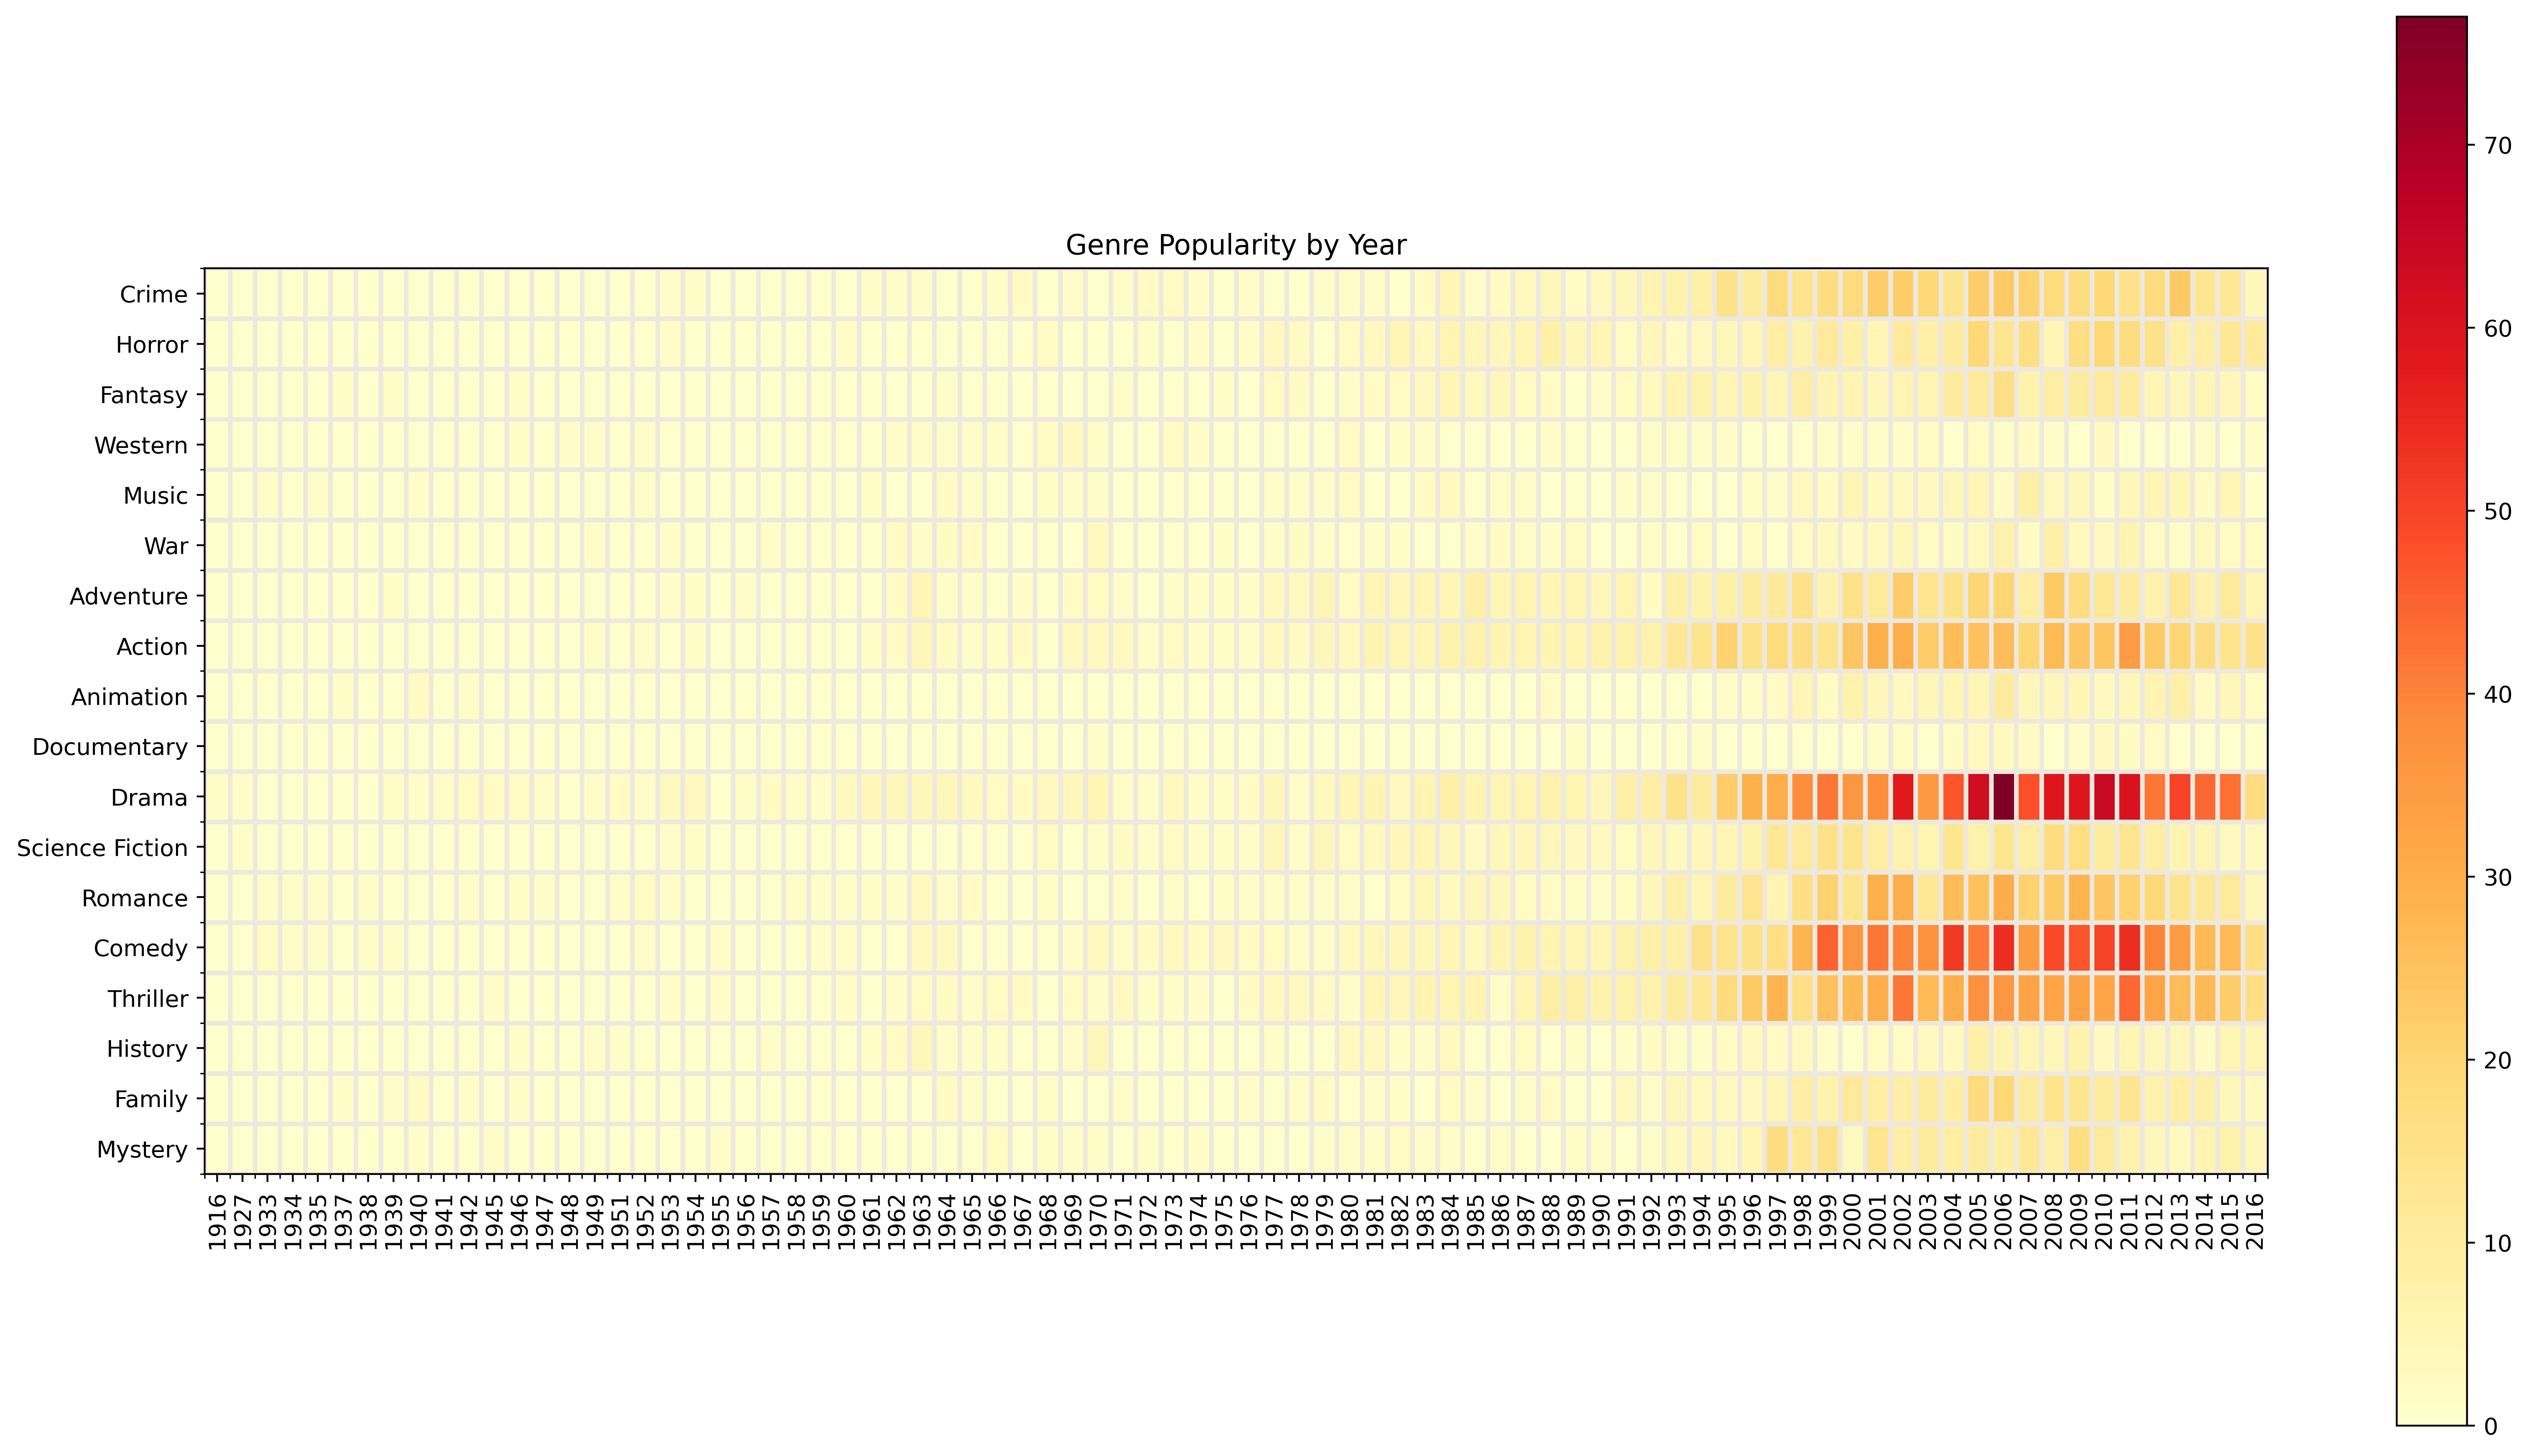

In [384]:
# # create a list of genres and years
plt.figure(figsize = (20,11), dpi=400)
# plt.figure(figsize=(10, 6), dpi=200)

data = np.zeros((len(all_genres),len(genre_dic)))
years = sorted([key for key in genre_dic])

for y_index, y in enumerate(years):
    for g_index, g in enumerate(all_genres):
        data[g_index, y_index] = genre_dic[y][g] 

# create the heatmap with aspect ratio of 2:1 and light-to-dark color scheme
plt.imshow(data, cmap='YlOrRd', aspect=2, vmin=0, vmax=data.max(), interpolation='nearest', extent=[-0.5, len(years) - 0.5, -0.5, len(all_genres) - 0.5])

# add borders to each pixel
plt.gca().set_xticks(np.arange(-0.5, len(years)), minor=True)
plt.gca().set_yticks(np.arange(-0.5, len(all_genres)), minor=True)
plt.grid(which='minor', color='#ede9df', linestyle='-', linewidth=2)

# invert the colormap
# plt.set_cmap(plt.cm.reversed('viridis'))

# add colorbar legend
plt.colorbar()

# set x-axis and y-axis labels and ticks
plt.xticks(np.arange(len(years)), years, rotation=90)
plt.yticks(np.arange(len(all_genres)), list(all_genres)[::-1])

# set title and display the plot
plt.title('Genre Popularity by Year')
plt.show()


From the heatmap, we can see that the popularity of some genres has remained consistent over time, such as drama, comedy, and thriller. Other genres, such as fantasy and science fiction, have become more popular over the years. We can also see some fluctuations in popularity for certain genres, such as horror and romance. 

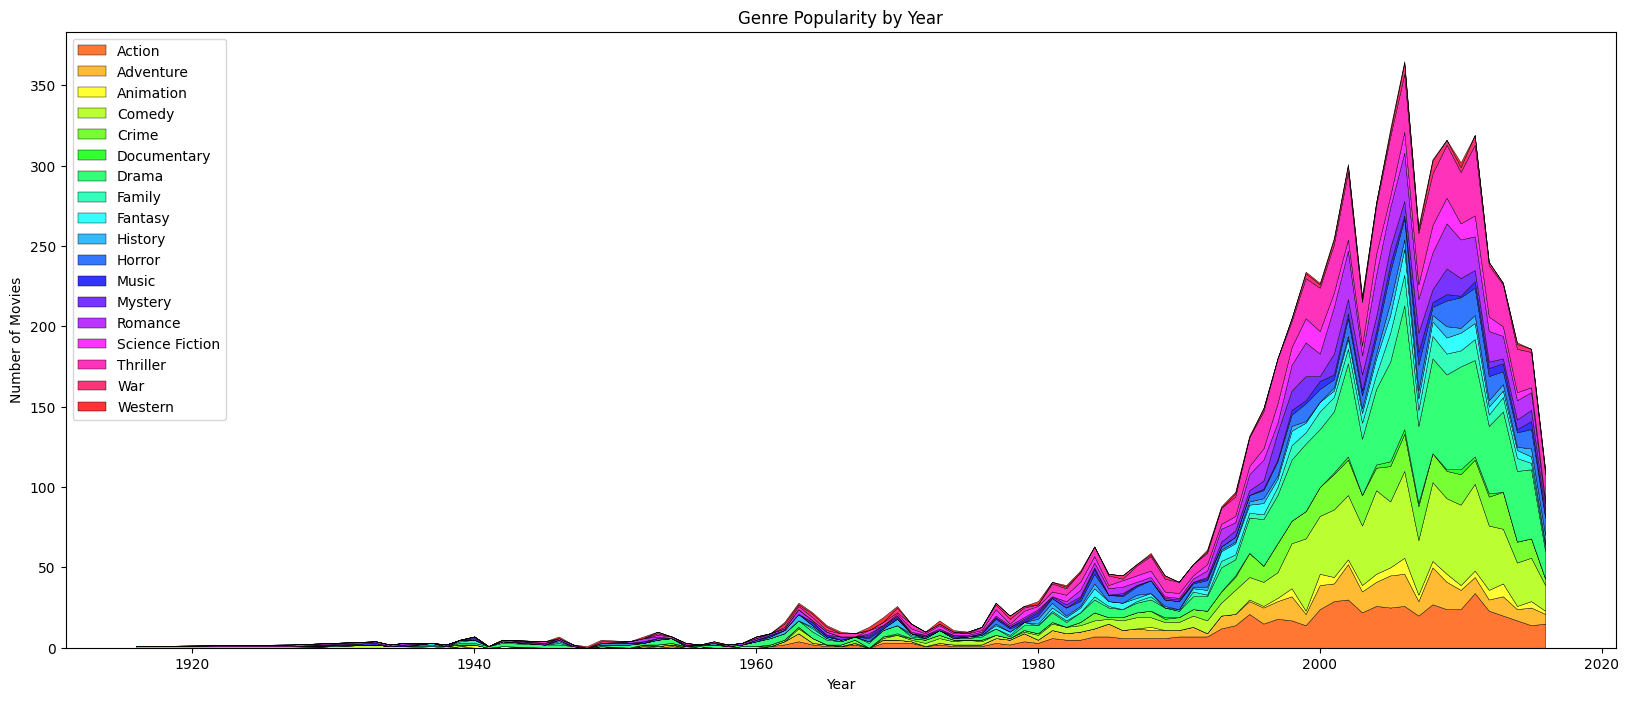

In [385]:
# create a list of genres and years
plt.figure(figsize=(20,8))
genres = sorted(list(set([genre for year in genre_dic for genre in genre_dic[year]])))
years = sorted(list(set([year for year in genre_dic])))

# create a data matrix for the stacked area plot
data = []
for genre in genres:
    genre_data = [genre_dic[year][genre] if genre in genre_dic[year] else 0 for year in years]
    data.append(genre_data)


# define the colors for the stacked area plot
# colors = ["blue","green", "yellow", "red", "black", "lightblue", "lightred", "lightgreen", "lightyellow"]
colors = []
for i in range(1, len(genres) + 1):
    color = colorsys.hsv_to_rgb(i/len(genres), 0.8, 1)
    colors.append((color[0], color[1], color[2], 1))

# create the stacked area plot
plt.stackplot(years, data, labels=genres, colors=colors, edgecolor='black', linewidth=0.3)

# add x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# set title and legend
plt.title('Genre Popularity by Year')
plt.legend(loc='upper left')



# display the plot
plt.show()


/var/folders/qb/vmdtz4r91t3891jx6ftsd6v80000gn/T/ipykernel_92594/2195940439.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearsoncorr = merged_df.loc[:,cols].corr(method='pearson')


<Axes: >

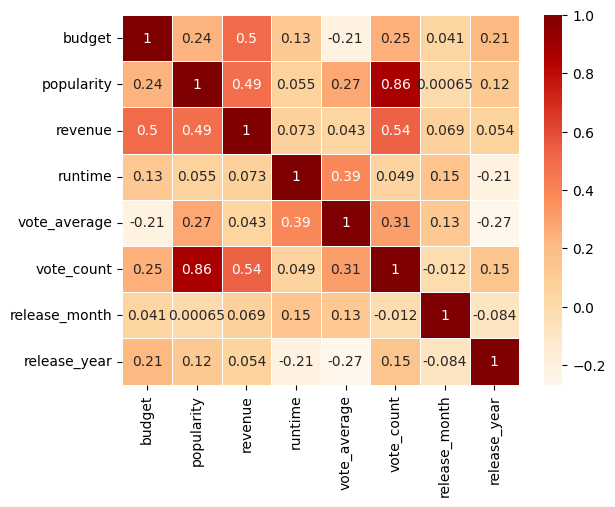

In [386]:
# Based on the heapmap, vote_average is the weakest feature correlated with revenue, whereas vote_count is the strongest feature correlated with revenue


cols = list(merged_df.columns)
cols.remove("id")
pearsoncorr = merged_df.loc[:,cols].corr(method='pearson')
sns.heatmap(pearsoncorr,
xticklabels=pearsoncorr.columns,
yticklabels=pearsoncorr.columns,
cmap='OrRd',
annot=True,
linewidth=0.5)

#Modelling

## Linear Regression

In [387]:
x = pd.DataFrame()
x["log_bud"] = merged_df["budget"].map(lambda x:np.log(x+1))
x["log_pop"] = merged_df["popularity"].map(lambda x:np.log(x+1))
x["log_vc"] = merged_df["vote_count"].map(lambda x:np.log(x+1))

y = merged_df["revenue"].map(lambda x:np.log(x+1))


In [388]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [389]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)
prediction = linear_regression_model.predict(x_test)

In [390]:
rmse = mean_squared_error(y_test, prediction, squared=False)
print("root mean squared error: ", rmse)

# Calculate the mean squared error of the model on the testing set
mse_test = mean_squared_error(y_test, prediction)

# Calculate the residual standard error of the model on the testing set
rse_test = np.sqrt(mse_test * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))

print("Residual Standard Error (RSE) on testing set:", rse_test)

root mean squared error:  1.4665562195967348
Residual Standard Error (RSE) on testing set: 1.4709231460451266


The result indicates that the model has relatively low errors and can be used to predict the revenue of movies in the dataset with a reasonable degree of accuracy.


In [391]:
linear_regression_model.coef_

array([0.48527198, 0.03677784, 0.70729002])

/var/folders/qb/vmdtz4r91t3891jx6ftsd6v80000gn/T/ipykernel_92594/721934583.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(y1, y2, cmap='cool', alpha=0.8)


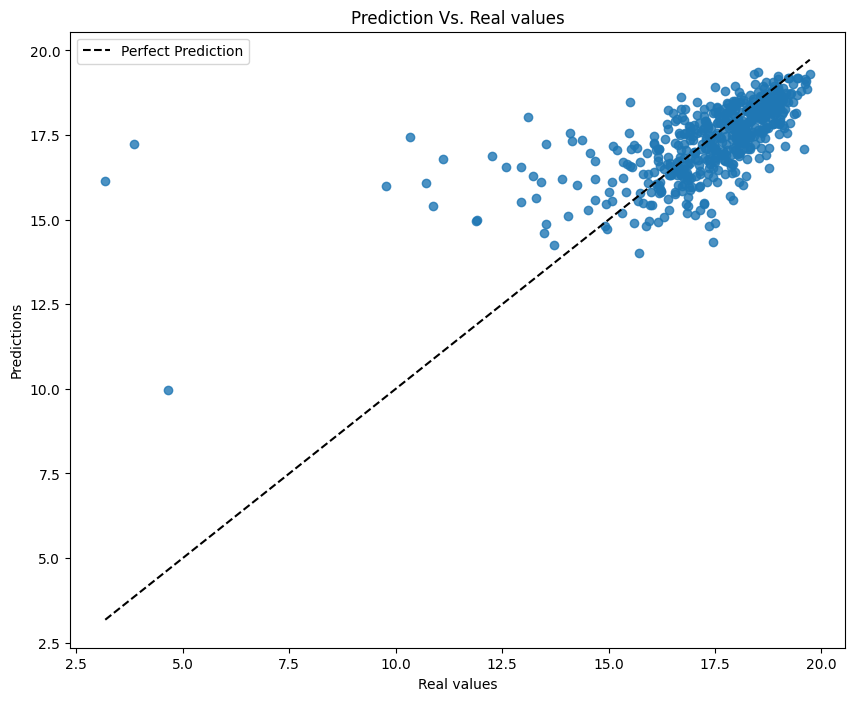

In [392]:

# Define data
y1 = list(y_test)
y2 = list(prediction)

# Compute line of perfect prediction
perfect_prediction = np.linspace(min(y1 + y2), max(y1 + y2), 100)

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(y1, y2, cmap='cool', alpha=0.8)
ax.plot(perfect_prediction, perfect_prediction, 'k--', label='Perfect Prediction')

# Add axis labels and title
ax.set_xlabel('Real values')
ax.set_ylabel('Predictions')
ax.set_title('Prediction Vs. Real values')

# Add legend
ax.legend()

# Show plot
plt.show()


In [393]:
scores = -cross_val_score(linear_regression_model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error') 
print(scores)
print(scores.mean())

[0.79221949 0.81682326 0.89047189 0.8441636  0.74975834]
0.8186873150887228


## Logistic Regression

In [394]:

x = pd.DataFrame()
x["log_bud"] = merged_df["budget"].map(lambda x:np.log(x+1))
x["log_pop"] = merged_df["popularity"].map(lambda x:np.log(x+1))
x["log_vc"] = merged_df["vote_count"].map(lambda x:np.log(x+1))


log_rev = merged_df["revenue"].map(lambda x:np.log(x+1))
x["target"] = [0 if z[0] < z[1] else 1 for z in zip(log_rev, x["log_bud"])]

# Balancing the class size for model performance
copied_data = x[x["target"] == 0]
x = x.append(copied_data)


y = x["target"]
x = x.drop(["target"], axis=1)



/var/folders/qb/vmdtz4r91t3891jx6ftsd6v80000gn/T/ipykernel_92594/3275586662.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(copied_data)


In [395]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

prediction = logistic_regression_model.predict(x_test)


In [396]:

score = f1_score(y_test, prediction)
print("Fl score:", score)

Fl score: 0.7782002534854247


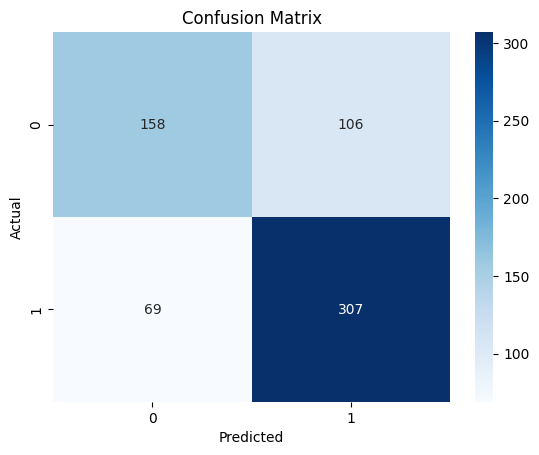

In [397]:

# Create confusion matrix
cm = confusion_matrix(y_test, prediction)

# Create heatmap with Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [398]:
# Calculate the mean squared error of the model on the testing set
mse_test = mean_squared_error(y_test, prediction)

# Calculate the residual standard error of the model on the testing set
rse_test = np.sqrt(mse_test * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))

print("Residual Standard Error (RSE) on testing set:", rse_test)


Residual Standard Error (RSE) on testing set: 0.5241443498963829


In [399]:
scores = cross_val_score(logistic_regression_model, x_train, y_train, cv=5, scoring='accuracy') 
print(scores)
print(scores.mean())

[0.734375   0.71484375 0.70507812 0.70898438 0.74951076]
0.7225584026418786


The logistic regression model achieved an F1 score of 0.778, indicating that it can accurately predict whether a movie will earn above or below its budget based on the selected features. The RSE value of 0.524 suggests that there is some level of error in the model's predictions. Overall, the model's performance is decent, but there is still room for improvement.


## KNN Classifier


In [400]:

x = pd.DataFrame()
x["log_bud"] = merged_df["budget"].map(lambda x:np.log(x+1))
x["log_pop"] = merged_df["popularity"].map(lambda x:np.log(x+1))
x["log_vc"] = merged_df["vote_count"].map(lambda x:np.log(x+1))

y = merged_df["revenue"]

# get y label (high-revenue and low revenue)
y_label = [1 if percentileofscore(y, i) > 50 else 0 for i in y]

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size=0.1, random_state=42)

# Initialize empty lists for k values and accuracy
k_values = []
accuracies = []

for i in range(1, 2200, 20):
    # instantiate KNN model with k=5
    knn = KNeighborsClassifier(n_neighbors=i)

    # fit the model on training data
    knn.fit(x_train, y_train)

    # make predictions on test data
    prediction = knn.predict(x_test)

    # evaluate the model's accuracy
    accuracy = accuracy_score(y_test, prediction)
    k_values.append(i)
    accuracies.append(accuracy)
  

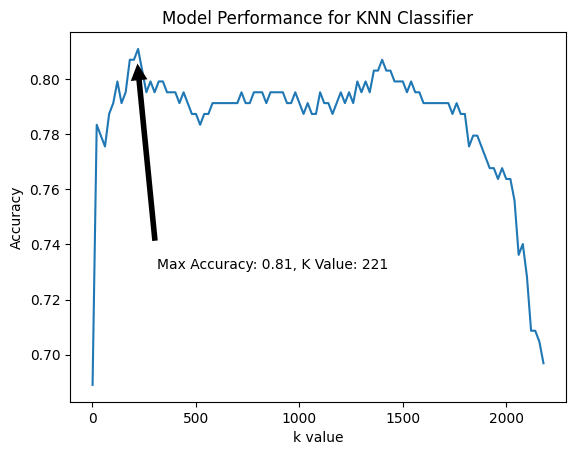

In [401]:
# Plot the graph
plt.plot(k_values, accuracies)
plt.title('Model Performance for KNN Classifier')
plt.xlabel('k value')
plt.ylabel('Accuracy')

# Add annotations (optional)
max_acc = max(accuracies)
max_index = accuracies.index(max_acc)
plt.annotate(f'Max Accuracy: {max_acc:.2f}, K Value: {k_values[max_index]}', xy=(max_index+200, max_acc), xytext=(max_index+300, max_acc-0.08),
arrowprops=dict(facecolor='black', shrink=0.07, linewidth=0.01))

plt.show()

In [402]:
knn = KNeighborsClassifier(n_neighbors=221)

# fit the model on training data
knn.fit(x_train, y_train)

# make predictions on test data
prediction = knn.predict(x_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, prediction)

In [403]:
score = f1_score(y_test, prediction)
print("Fl score:", score)


# Calculate the mean squared error of the model on the testing set
mse_test = mean_squared_error(y_test, prediction)

# Calculate the residual standard error of the model on the testing set
rse_test = np.sqrt(mse_test * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))

print("Residual Standard Error (RSE) on testing set:", rse_test)


Fl score: 0.808
Residual Standard Error (RSE) on testing set: 0.4373146401484736


In [404]:
scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy') 
print(scores)
print(scores.mean())

[0.77631579 0.76535088 0.80263158 0.75877193 0.79824561]
0.7802631578947369


The linear regression model has an F1 score of 0.808 and RSE of 0.437, indicating that the model has a relatively good fit to the data.

# Conclusion

Linear Regression Model - The model is a regression model that utilizes budget, popularity, and vote count as input features to predict movie revenue. It learns the patterns and correlations between these features and revenue from a training dataset, and can then generate revenue predictions for new movies based on these learned relationships.

Logistic Regression Model - The logistic regression model takes budget, popularity, and vote count as input features to classify movies as either profitable or not. It learns the relationship between these features and the binary outcome of profitability from a training dataset, using a logistic function to model the probability of a movie being profitable. 

KNN Model - The model takes into consideration the budget, popularity, and vote count of movies to classify them as high-revenue or low-revenue. It does this by comparing the features of a new movie to the K number of nearest neighbors in the training dataset. The label assigned to the new movie is determined by the majority class of its K nearest neighbors.

